# Question 3

In [90]:
#Step 1. Import the necessary libraries
#importing pandas and numpy.random libraries.
import pandas as pd
from numpy.random import randint

In [91]:
#Step 2. Create 3 differents Series, each of length 100, as follows:
# The first a random number from 1 to 4
# The second a random number from 1 to 3
# The third a random number from 10,000 to 30,000
x=pd.Series(randint(1,4,100))  #creating a series containing 100 numbers from 1 to 4.
y=pd.Series(randint(1,3,100))  #creating a series containing 100 numbers from 1 to 3.
z=pd.Series(randint(10000,30000,100)) #creating a series containing 100 numbers from 10000 to 30000.


In [94]:
#Step 3. Create a DataFrame by joinning the Series by column
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
twoYears = pd.DataFrame({'bedrs':x,'bathrs':y,'price':z})
print(twoYears)

    bedrs  bathrs  price
0       3       1  22157
1       2       1  17904
2       1       2  10110
3       2       1  22892
4       1       1  20107
..    ...     ...    ...
95      1       2  15136
96      2       2  29943
97      2       2  25523
98      1       1  20921
99      1       2  11372

[100 rows x 3 columns]


In [95]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
#to 'bigcolumn'
bigcolumn=pd.DataFrame(pd.concat([x,y,z]))
print(bigcolumn)


        0
0       3
1       2
2       1
3       2
4       1
..    ...
95  15136
96  29943
97  25523
98  20921
99  11372

[300 rows x 1 columns]


In [ ]:
#Step 6. Ops it seems it is going only until index 99. Is it true?

#Yes from the above, we can see that the index is 99.

In [96]:
#step 7.
bigcolumn.reset_index(drop=True,inplace=True)
bigcolumn
#we can see that that bigcolumn has 100 elements.

,0
0,3
1,2
2,1
3,2
4,1
...,...
295,15136
296,29943
297,25523
298,20921


# Question 4 Python
Wind Statistics 

References:
1. Course material.
2. Python Pandas Tutorial, Edureka, Youtube.
3. Some steps are completed with the knowledge of this document https://zhuanlan.zhihu.com/p/69860552

In [134]:
#Step 1. Import the necessary libraries
import pandas as pd

In [135]:
#Step 2. Import the dataset from this address
dataset='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data' #reading the file.
data=pd.read_csv(dataset,sep='\s+')
print(data)

      Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA  \
0     61   1   1  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25   
1     61   1   2  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   
2     61   1   3  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   
3     61   1   4  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   
4     61   1   5  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54   
...   ..  ..  ..    ...    ...    ...    ...    ...    ...    ...    ...   
6569  78  12  27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59   
6570  78  12  28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25   
6571  78  12  29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46   
6572  78  12  30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87   
6573  78  12  31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63   

        MUL    CLO    BEL    MAL  
0     10.83  12.58  18.50  15.04  
1      9.79   9.6

In [136]:
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
#datetime index.
data1=data
#converting the Yr, Mo, Dy column to strings and then adding them.
form=data1.Yr.astype(str)+ '-'+ data1.Mo.astype(str)+'-'+data1.Dy.astype(str) 
data1['date']= form
print(data1['date'])

0         61-1-1
1         61-1-2
2         61-1-3
3         61-1-4
4         61-1-5
          ...   
6569    78-12-27
6570    78-12-28
6571    78-12-29
6572    78-12-30
6573    78-12-31
Name: date, Length: 6574, dtype: object


In [137]:
data['date']=pd.to_datetime(data1['date'],format='%y-%m-%d') #converting to date-time-format
data['date']

0      2061-01-01
1      2061-01-02
2      2061-01-03
3      2061-01-04
4      2061-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: date, Length: 6574, dtype: datetime64[ns]

In [138]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
#and apply it.
form='19'+data1.Yr.astype(str)+ '-'+ data1.Mo.astype(str)+'-'+data1.Dy.astype(str)#Added 19 to the year. 
data1['date']= form
data['date']=pd.to_datetime(data1['date'],format='%Y-%m-%d')

In [139]:
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [140]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be
#datetime64[ns].
data.date.dtype   #The date is in ns.

dtype('<M8[ns]')

In [141]:
data.set_index('date',inplace=True) #Setting date as a index.

In [142]:
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,,,,
1961-01-01,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [14]:
#Step 6. Compute how many values are missing for each location over the entire
#record.They should be ignored in all calculations below.
data.isna().sum()  #isna checks for null values and .sum gives the count of these null values.

Yr     0
Mo     0
Dy     0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [15]:
#Step 7. Compute how many non-missing values there are in total.
(data.loc[:,'RPT':'MAL'].isna() ==False).sum().sum()  #Gives the count of non-null values.

78857

In [17]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
#all the times.
data.loc[:,'RPT':'MAL'].mean().mean()
sub=data.loc[:,'RPT':'MAL']
sub

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [19]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
#windspeeds and standard deviations of the windspeeds at each location over all the days
#A different set of numbers for each location.

loc_stats=pd.DataFrame(sub.describe())
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [21]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each
#day. A different set of numbers for each day.

day_stats=pd.DataFrame(sub.T.describe())
day_stats

date,1961-01-01,1961-01-02,1961-01-03,1961-01-04,1961-01-05,1961-01-06,1961-01-07,1961-01-08,1961-01-09,1961-01-10,...,1978-12-22,1978-12-23,1978-12-24,1978-12-25,1978-12-26,1978-12-27,1978-12-28,1978-12-29,1978-12-30,1978-12-31
count,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,13.018182,11.336364,11.641818,6.619167,10.630000,8.240000,10.385000,10.487500,9.897500,10.47750,...,7.000833,15.613333,10.823333,5.729167,6.523333,16.708333,15.150000,14.890000,15.367500,15.402500
std,2.808875,3.188994,3.681912,3.198126,2.445356,2.998063,3.072114,3.547237,2.905954,3.44261,...,3.237337,3.850840,7.195039,3.583263,4.304510,7.868076,9.687857,5.756836,5.540437,5.702483
min,9.290000,6.500000,6.170000,1.790000,6.170000,4.420000,4.960000,5.910000,4.750000,6.54000,...,2.460000,9.500000,4.790000,0.750000,1.960000,8.080000,5.000000,8.710000,9.130000,9.590000
25%,10.540000,9.730000,9.315000,4.570000,9.807500,6.345000,8.237500,7.620000,7.977500,8.48750,...,5.077500,12.987500,5.840000,4.102500,3.070000,13.802500,9.095000,10.477500,12.375000,11.530000
50%,13.170000,10.830000,11.250000,5.855000,11.170000,7.810000,9.395000,9.685000,10.065000,9.35500,...,6.795000,15.395000,10.040000,5.230000,4.540000,15.025000,13.895000,14.210000,13.455000,12.080000
75%,15.000000,13.225000,12.730000,9.117500,12.170000,10.137500,13.572500,11.792500,11.267500,11.52250,...,8.765000,17.495000,11.970000,7.365000,10.722500,17.302500,16.700000,17.035000,18.185000,19.520000
max,18.500000,17.540000,18.500000,11.750000,13.330000,13.210000,14.290000,16.620000,15.370000,19.50000,...,13.080000,22.210000,31.710000,13.960000,13.830000,40.080000,41.460000,29.580000,28.790000,27.290000


In [22]:
#Step 11. Find the average windspeed in January for each location.
data[data.Mo==1].loc[:,'RPT':'MAL'].mean() #Extracting the values of only January (Mo==1) for different locations and taking their mean.

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [24]:
#Step 12. Downsample the record to a yearly frequency for each location.
sample0=data.resample('A').mean()  
sample0

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,,,,
1961-12-31,61.0,6.526027,15.720548,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,62.0,6.526027,15.720548,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,63.0,6.526027,15.720548,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,64.0,6.513661,15.756831,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,65.0,6.526027,15.720548,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,66.0,6.526027,15.720548,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,67.0,6.526027,15.720548,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,68.0,6.513661,15.756831,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,69.0,6.526027,15.720548,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [25]:
#Step 13. Downsample the record to a monthly frequency for each location.
sample1=data.resample('M').mean()  #downsampling the record to a montly frequency for each location.
sample1

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,,,,
1961-01-31,61.0,1.0,16.0,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,61.0,2.0,14.5,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,61.0,3.0,16.0,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,61.0,4.0,15.5,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,61.0,5.0,16.0,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,78.0,8.0,16.0,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,78.0,9.0,15.5,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,78.0,10.0,16.0,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [57]:
#step14 Downsample the record to a weekly frequency for each location.
sample2=data.resample('W').mean()
sample2

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,,,,
1961-01-01,61.0,1.000000,1.000000,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,61.0,1.000000,5.000000,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,61.0,1.000000,12.000000,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,61.0,1.000000,19.000000,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,61.0,1.000000,26.000000,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,78.0,11.428571,17.142857,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,78.0,12.000000,7.000000,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,78.0,12.000000,14.000000,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


# Question 5 Python

# References:
1. Course Material
2. Python Pandas Tutorial, Edureka, Youtube.(A course of 2 hours in length).
3. Data analysis with Pandas and other related videos on Youtube.( A course of 1 hour in length)

In [185]:
#step1   Import the necessary libraries
import pandas as pd

In [186]:
#step2  Import the dataset from this address.
url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
data=pd.read_csv(url,'\t')

In [187]:
data #displaying the data.

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [188]:
#step3  Assign it to a variable called chipo.
chipo=data

In [189]:
#step4   See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [190]:
#step5 What is the number of observations in the dataset?
chipo.info() #The dataset has 4622 observations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [191]:
chipo.shape  #The dataset has 4622 rows and 5 columns.

(4622, 5)

In [192]:
#step 6 What is the number of columns in the dataset?
chipo.shape
#The dataset has 5 columns.

(4622, 5)

In [193]:
#step 7  Print the name of all the columns.
chipo.columns
#order_id, quantity, item_name, choice_description and item_price are the name of all the columns.

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [194]:
#step 8  How is the dataset indexed?
chipo.index
#The index of the dataset starts at 0 and ends at 4622 with an increment of 1.

RangeIndex(start=0, stop=4622, step=1)

In [195]:
#step 9  Which was the most-ordered item?
items=chipo.groupby(['item_name']).agg({'quantity':'sum'})
items.sort_values('quantity', ascending =False)
#Chicken bowl is the most-ordered item.

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


In [196]:
#Step 10  For the most-ordered item, how many items were ordered?
#Chicken bowl is the most ordered item with 761 orders.

In [197]:
#step 11  What was the most ordered item in the choice_description column?
items=chipo.groupby(['choice_description']).agg({'quantity':'sum'})
items.sort_values('quantity', ascending =False)
#Diet Coke is the most ordered item in the choice_description.

,quantity
choice_description,
[Diet Coke],159
[Coke],143
[Sprite],89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",42
...,...
"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Pinto Beans, Guacamole, Lettuce]]",1
"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Sour Cream, Lettuce]]",1
"[Roasted Chili Corn Salsa, [Fajita Vegetables, Sour Cream, Lettuce, Guacamole]]",1


In [198]:
#step 12  How many items were orderd in total?
chipo.quantity.sum()
#A total of 4972 items are ordered.

4972

In [199]:
#step 13
chipo['item_price']=chipo.item_price.str.slice(1).astype(float)
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [180]:
#step 13 a

In [181]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [182]:
#step 13 b
lam=lambda x: float(x[1:])
chipo.item_price.apply(lam)

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [183]:
# step 13.c
chipo['item_price']=chipo.item_price.apply(lam)[:5]

In [164]:
#step 14  How much was the revenue for the period in the dataset?
chipo['item_price'].sum()
#The revenue for the period in the dataset is 34500.16$

34500.16

In [99]:
#step 15 How many orders were made in the period?
chipo['quantity'].sum()
#A total of 4972 orders were made.

4972

In [205]:
#step 16 What i the average revenue amount per order?
#The average revenue amount per order is 7.46$

In [206]:
#step 16 solution
chipo['item_price'].mean()

7.464335785374397

In [102]:
#step 17 How many different items are sold?
chipo.item_name.nunique()
#A total of 50 different items were sold.

50

# Question 6 Python
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

References:
1. Course material.
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html

Text(0, 0.5, 'Count Per capita')

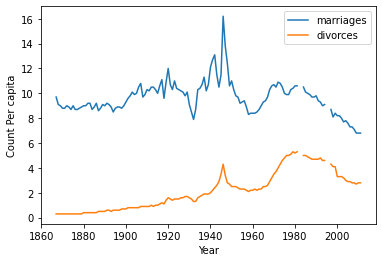

In [207]:
import pandas as pd
data = pd.read_csv('us-marriages-divorces-1867-2014.csv') #Reading the csv file.
years = data['Year'].values    #getting the values of Year column.
marriages= data['Marriages_per_1000'].values #Obtaining the values in Marriages_per_1000 column.
divorces= data['Divorces_per_1000'].values   #getting the values in Divorces_per_100 column.
df = pd.DataFrame({ 'marriages': marriages, 'divorces': divorces }, index=years) #Creating a dataframe.
lines = df.plot.line()  #Plotting a line graph.
plt.xlabel("Year")      #Naming the x-axis
plt.ylabel("Count Per capita") #Naming the y-axis


# Question 7 Python
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!


References:
1. Course Material
2. https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/(Usage of Lambda function)

<ipython-input-208-04f7b0786e30>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = us_marriage_divorce_data[data['Year'].apply(lambda x: x in [1900, 1950, 2000])] #Extracting the data for 1900, 1950, 2000


Text(0, 0.5, 'Count Per capita')

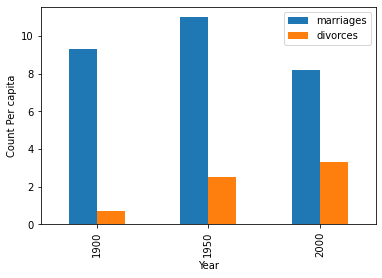

In [208]:
import pandas as pd
data = pd.read_csv('us-marriages-divorces-1867-2014.csv') #Reading the file in csv format.
data = us_marriage_divorce_data[data['Year'].apply(lambda x: x in [1900, 1950, 2000])] #Extracting the data for 1900, 1950, 2000
years = data['Year'].values  #Getting the values for the Year Column.
marriages= data['Marriages_per_1000'].values #Getting the values of Marriages_per_1000 column.
divorces= data['Divorces_per_1000'].values
df = pd.DataFrame({ 'marriages': marriages,'divorces': divorces}, index=years) #Creating a data frame.
lines = df.plot.bar() #Plotting a bar chart.
plt.xlabel("Year")  #Naming the x-axis
plt.ylabel("Count Per capita") #Naming the y-axis

# Question 8 Python
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

References:
1. Course Material
2. https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.barh.html

In [105]:
import pandas as pd
actor_data = pd.read_csv('actor_kill_counts.csv') #Reading the csv file.
names = actor_data['Actor'].values    #Storing the names of actors in names variable.
counts = actor_data['Count'].values   #Storing the count of kills in counts variable.

Text(0, 0.5, 'actor_name')

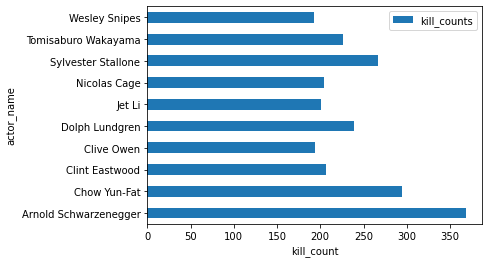

In [109]:
df = pd.DataFrame({'Actor':names, 'kill_counts':counts},index=names) #Creating a data frame.
df.plot.barh()  #plotting the horizontal bar graph.
plt.xlabel("kill_count") #labelling the x-axis
plt.ylabel("actor_name") #labelling the y-axis

# Question 9 Python
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.


References:
1. Course Material
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [68]:
y=open("roman-emperor-reigns .csv","r")
list1=[]
for line in y:
        li=list(line.split(","))
        list1.append(li)
print(list1)


[['Emperor', 'Length_of_Reign', 'Cause_of_Death\n'], ['Augustus', '40.58', 'Possibly assassinated\n'], ['Tiberius', '22.5', 'Possibly assassinated\n'], ['Caligula', '4.83', 'Assassinated\n'], ['Claudius', '13.75', 'Possibly assassinated\n'], ['Nero', '13.67', 'Suicide\n'], ['Galba', '0.58', 'Assassinated\n'], ['Otho', '0.25', 'Suicide\n'], ['Vitellius', '0.67', 'Assassinated\n'], ['Vespasian', '10', 'Natural causes\n'], ['Titus', '3.25', 'Illness\n'], ['Domitian', '15', 'Assassinated\n'], ['Nerva', '1.33', 'Natural causes\n'], ['Trajan', '19.58', 'Natural causes\n'], ['Hadrian', '21', 'Natural causes\n'], ['Antoninus Pius', '22.58', 'Natural causes\n'], ['Marcus Aurelius', '19', 'Illness\n'], ['Lucius Verus', '8', 'Illness\n'], ['Commodus', '15', 'Assassinated\n'], ['Pertinax', '0.25', 'Assassinated\n'], ['Didius Julianus', '0.16', 'Executed\n'], ['Septimius Severus', '17.83', 'Natural causes\n'], ['Caracalla', '19', 'Assassinated\n'], ['Geta', '3', 'Assassinated\n'], ['Macrinus', '1.1

In [70]:
#Determining the labels.
label=[]
for x in list1:
    if x not in label:
        label.append(x[2])
labels=list(set(label))
print(labels)

['Died in captivity\n', 'Natural causes', 'Illness\n', 'Killed in battle\n', 'Suicide\n', 'Possibly assassinated\n', 'Natural causes\n', 'Cause_of_Death\n', 'Assassinated\n', 'Executed\n']


In [71]:
# Finding the corresponding values of labels in the dataset.
freq = {} 
for item in list1: 
    if (item[2] in freq):
        freq[item[2]] += 1
    else:
        freq[item[2]] = 1
print(freq)

{'Cause_of_Death\n': 1, 'Possibly assassinated\n': 8, 'Assassinated\n': 22, 'Suicide\n': 5, 'Natural causes\n': 15, 'Illness\n': 5, 'Executed\n': 3, 'Killed in battle\n': 8, 'Died in captivity\n': 1, 'Natural causes': 1}


In [72]:
#Extracting the labels and values from the dictionary.
labe=list(freq.keys())
values=list(freq.values())
print(labe)
print(values)

['Cause_of_Death\n', 'Possibly assassinated\n', 'Assassinated\n', 'Suicide\n', 'Natural causes\n', 'Illness\n', 'Executed\n', 'Killed in battle\n', 'Died in captivity\n', 'Natural causes']
[1, 8, 22, 5, 15, 5, 3, 8, 1, 1]


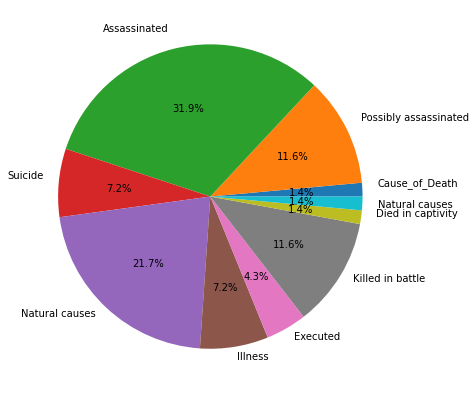

In [73]:
#plotting the pie-chart.
from matplotlib import pyplot as plt 
import numpy as np   
fig = plt.figure(figsize =(10, 7)) 
plt.pie(values, labels = labe, autopct='%1.1f%%') 
# show plot 
plt.show() 
# The below pie-chart showing the distribution of various categories.

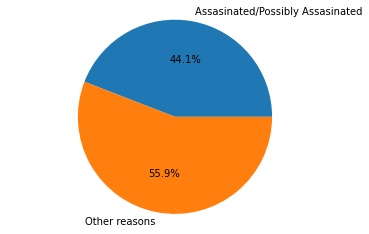

In [209]:
# This is another way of plotting the pie chart using pandas.
import pandas as pd
data = pd.read_csv('roman-emperor-reigns.csv') #Reading the csv file.
A= data[roman_emperors['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())] 
count_A = len(A)  #Counting the number of emperors assasinated+possibly assassinated.
count_O = len(roman_emperors) - count_A  #Counting the deaths of emperors due to other reasons.
Tasks=[count_A, count_O]
my_labels = 'Assasinated/Possibly Assasinated','Other reasons' #Labelling the plot.
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%') #Plotting the pie chart.
plt.axis('equal')
plt.show()

# Question 10 Python
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

References:
1. Course Material.
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

In [210]:
import pandas as pd
datafile = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv') #Reading a csv file.
revenue = datafile['Total Arcade Revenue (billions)'].values #Storing the value from the revenue column to revenue.
doctorates = datafile['Computer Science Doctorates Awarded (US)'].values #Storing the number of doctarates into doctorates.
year= datafile['Year'].values  #Getting the values in Year column.

Text(0, 0.5, 'Doctarates awarded')

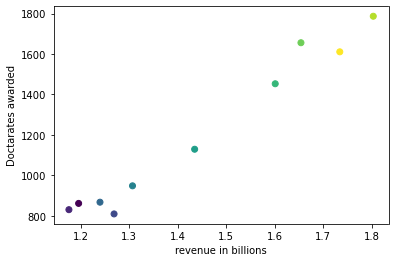

In [211]:
plt.scatter(revenue,doctorates,c=year,label=year) #plotting the scatter plot.
plt.xlabel("revenue in billions") #Labeling the x-axis
plt.ylabel("Doctarates awarded")  #Labeling the y-axis
#plt.text(arcade_revenue+10, cs_doctorates_awarded+10, year)

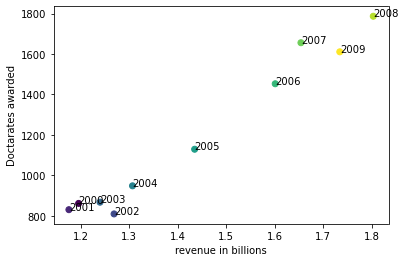

In [212]:
#Coloring each dot according to the year.
fig, ax = plt.subplots()
ax.scatter(revenue, doctorates, c=year)
plt.xlabel("revenue in billions")
plt.ylabel("Doctarates awarded")
for i, txt in enumerate(year):
    ax.annotate(txt, (revenue[i], doctarates[i]))